In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv("googleplaystore_user_reviews.csv", encoding="latin1")

data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [2]:
# we're interested in translated review...so, we're seperating them
data = pd.concat([data.Translated_Review,data.Sentiment],axis=1)

# dropping nan values
data.dropna(axis=0,inplace=True)

data.tail()

,Translated_Review,Sentiment
64222,Most ads older many agents ..not much owner po...,Positive
64223,"If photos posted portal load, fit purpose. I'm...",Positive
64226,"Dumb app, I wanted post property rent give opt...",Negative
64227,I property business got link SMS happy perform...,Positive
64230,"Useless app, I searched flats kondapur, Hydera...",Negative


In [3]:
data.Sentiment.unique() 

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [4]:
data.Sentiment.value_counts() 

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

In [5]:
# converting these as a value...0=pos , 1=neg , 2=neu

data.Sentiment = [0 if i=="Positive" else 1 if i== "Negative" else 2 for i in data.Sentiment]

Text(0.5, 1.0, 'Count of Sentiments')

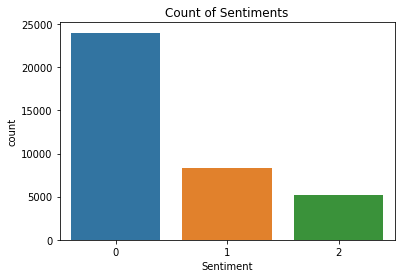

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data.Sentiment)
plt.title("Count of Sentiments")

In [8]:
data.Sentiment.value_counts()

0    23998
1     8271
2     5158
Name: Sentiment, dtype: int64

### preprocessing

In [13]:
import re # Regular expression for deleting characters which are not letter

first_sample = data.Translated_Review[9] 
sample = re.sub("[^a-zA-Z]"," ",first_sample)
sample = sample.lower()

print(f"Raw:{data.Translated_Review[9]} \nAfter cleaning: {sample}")

Raw:It helpful site ! It help foods get ! 
After cleaning: it helpful site   it help foods get  


In [14]:
# stopwords

import nltk  
from nltk.corpus import stopwords 

sample = nltk.word_tokenize(sample)

print(sample)

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\faisal/nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\share\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\faisal\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [15]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\faisal\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [16]:
# stopwords

import nltk  
from nltk.corpus import stopwords 

sample = nltk.word_tokenize(sample)

print(sample)

['it', 'helpful', 'site', 'it', 'help', 'foods', 'get']


In [17]:
# dropping unnecessary words

sample = [word for word in sample if not word in set(stopwords.words("english"))]

print(sample)

['helpful', 'site', 'help', 'foods', 'get']


In [18]:
# lemmatization. using lemmatization we can convert words to stem. e.g, honesty->honest

lemma = nltk.WordNetLemmatizer()  
sample = [ lemma.lemmatize(word) for word in sample]
sample = " ".join(sample)

LookupError: 
**********************************************************************
  Resource [93mwordnet[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('wordnet')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/wordnet[0m

  Searched in:
    - 'C:\\Users\\faisal/nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\share\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\faisal\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [19]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\faisal\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [20]:
# lemmatization. using lemmatization we can convert words to stem. e.g, honesty->honest

lemma = nltk.WordNetLemmatizer()  
sample = [ lemma.lemmatize(word) for word in sample]
sample = " ".join(sample)

In [21]:
# lets use all of these together

text_list = []
for i in data.Translated_Review:
    text = re.sub("[^a-zA-Z]"," ",i)
    text = text.lower()
    text = nltk.word_tokenize(text)
    lemma = nltk.WordNetLemmatizer()
    text = [lemma.lemmatize(word) for word in text]
    text = " ".join(text)
    text_list.append(text)
    

text_list[:5]

['i like eat delicious food that s i m cooking food myself case best food help lot also best before shelf life',
 'this help eating healthy exercise regular basis',
 'work great especially going grocery store',
 'best idea u',
 'best way']

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

max_features = 1000
cou_vec = CountVectorizer(max_features=max_features) # stop_words="english" you can add but we have already applied it.
sparce_matrix = cou_vec.fit_transform(text_list).toarray()
all_words = cou_vec.get_feature_names()

print("Most used 50 words: ",all_words[0:50])

Most used 50 words:  ['ability', 'able', 'about', 'absolutely', 'access', 'account', 'accurate', 'across', 'action', 'activity', 'actual', 'actually', 'ad', 'add', 'added', 'addicted', 'addicting', 'addictive', 'adding', 'advert', 'advertisement', 'after', 'again', 'age', 'ago', 'alarm', 'alert', 'all', 'allow', 'allows', 'almost', 'along', 'alot', 'already', 'also', 'although', 'always', 'am', 'amazing', 'amazon', 'amount', 'an', 'and', 'android', 'anime', 'annoying', 'another', 'answer', 'any', 'anymore']


### applying model

In [23]:
# train test split

y = data.iloc[:,1].values
x = sparce_matrix

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [24]:
# naive bayes

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(xtrain,ytrain)

print("acc : ", nb.score(xtest,ytest))

acc :  0.5903018968741651


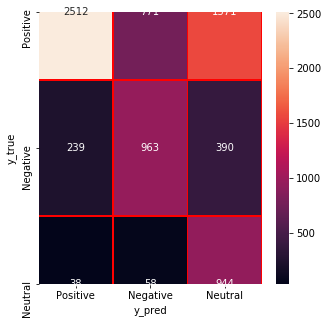

In [27]:
y_pred=nb.predict(xtest)

from sklearn.metrics import confusion_matrix
import seaborn as sns

names = ["Positive","Negative","Neutral"]
cm = confusion_matrix(ytest,y_pred)
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)

plt.xlabel("y_pred")
plt.ylabel("y_true")

ax.set_xticklabels(names)
ax.set_yticklabels(names)

plt.show()

In [28]:
# random forest 

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators = 10, random_state=42)
rf.fit(xtrain,ytrain)

print("acc: ",rf.score(xtest,ytest))

acc:  0.8936681806037937


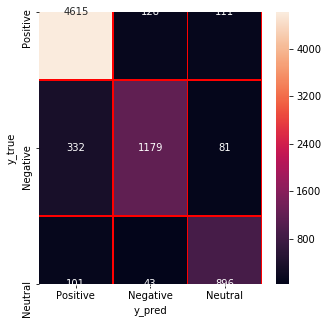

In [29]:
y_pred=rf.predict(xtest)

from sklearn.metrics import confusion_matrix
import seaborn as sns

names=["Positive","Negative","Neutral"]
cm=confusion_matrix(ytest,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)

plt.xlabel("y_pred")
plt.ylabel("y_true")

ax.set_xticklabels(names)
ax.set_yticklabels(names)

plt.show()

In [30]:
# logistic regression

from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(xtrain,ytrain)

print("Logistic Regression accuracy: ",lr.score(xtest,ytest))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression accuracy:  0.9010152284263959


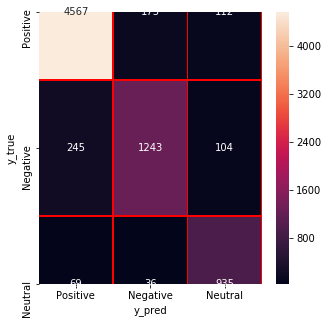

In [31]:
y_pred=lr.predict(xtest)

from sklearn.metrics import confusion_matrix
import seaborn as sns

names=["Positive","Negative","Neutral"]
cm=confusion_matrix(ytest,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)

plt.xlabel("y_pred")
plt.ylabel("y_true")

ax.set_xticklabels(names)
ax.set_yticklabels(names)

plt.show()